In [2]:
import theano
from theano import tensor as T, function

#import numpy as np
import numpy as np

In [10]:
#Function definition in Theano 
X = T.matrix('x')
Y = X ** 2
Z = T.grad(Y.sum(), X)
F = function([X], [Y, Z])

In [11]:
x = np.ones((2,2)) * 3
Y, Z = F(x)

In [13]:
print(x)
print('-' * 12)
print(Y)
print(Z)

[[ 3.  3.]
 [ 3.  3.]]
------------
[[ 9.  9.]
 [ 9.  9.]]
[[ 6.  6.]
 [ 6.  6.]]


In [15]:
import matplotlib.pyplot as plt
from IPython import display
import time
%matplotlib inline

In [18]:
#noise variance, control how hard is the problem larger the harder
noise_var = 0.5
n_samples = 1000 # number of observations
n = np.random.normal(0, noise_var, n_samples)
x = np.arange(n_samples)
x = (x - x.mean()) / x.std() # always a good practice to standardize the input data)
w, b = np.random.randn(2)
d = w*x + b # Correct answer
y = d + n # noisy observations

In [21]:
X, Y = T.vectors('input', 'desired')
W = theano.shared(.01)
B = theano.shared(0.)
Z = W*X + B
cost = ((Y-Z)**2).mean() #Cost is the mean squared value
params = (W, B) # parameters that should be learned

In [22]:
#Changing the theano variable in place
W.get_value()

array(0.01)

In [23]:
W

<TensorType(float64, scalar)>

In [24]:
updates = ((W, W*2), )
double_w = function([],[], updates = updates)

In [26]:
double_w()
W.get_value()

array(0.02)

In [29]:
#Training the model
#cost = (d-y)**2

#updates
# w = w - lr*grad(cost, w) = w + lr*2*(d-y)*x
# b = b - lr*grad(cost, b) = b + lr*2*(d-y)

lr = 0.1
grads = (T.grad(cost, p) for p in params)
updates = [(p, p - lr*g) for p,g in zip(params, grads)]

print updates

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0), (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]


In [30]:
train = function([X, Y], cost, updates = updates)

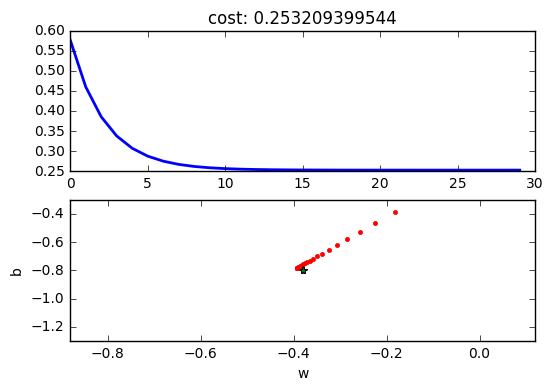

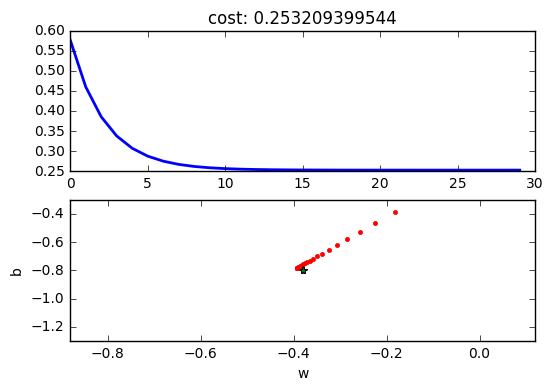

In [33]:
epochs = 30
final_cost = []
for i in range(epochs):
    #This is all we need to train the model, to call train.
    final_cost.append(train(x,y))
    #Extra niceties
    what, bhat = W.get_value(), B.get_value()
    #cost function
    plt.subplot(211)
    plt.cla()
    plt.title('cost: {}'.format(final_cost[-1]))
    plt.plot(final_cost, linewidth=2.)
    #parameter space
    plt.subplot(212)
    plt.plot(w,b, '*', linewidth=2.)
    plt.plot(what, bhat, '.r', linewidth=2.)
    plt.xlim(w-.5, w+.5)
    plt.ylim(b-.5, b+.5)
    plt.xlabel('w')
    plt.ylabel('b')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)

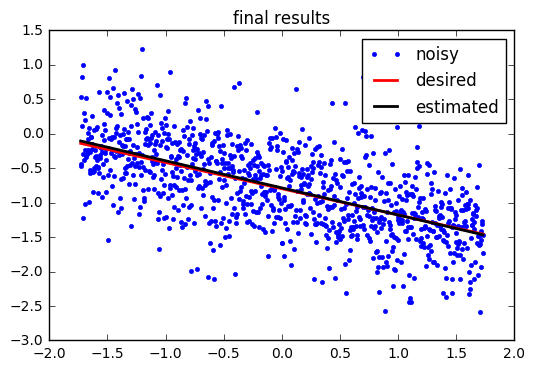

In [37]:
#estimated line
plt.title('final results')
plt.plot(x,y, '.')
plt.plot(x, d, 'r', linewidth=2.)
plt.plot(x, what*x + bhat, 'k', linewidth=2.)
plt.legend(('noisy', 'desired', 'estimated'))